In [0]:
import matplotlib.pyplot as plt

# Some graph configurations
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["font.size"] = 7
plt.rcParams["figure.dpi"] = 180
plt.rcParams['lines.linewidth'] = 1

# constants
g = 9.80665   # using capital G as small g is reserved for functions below
m1 = m2 = 0.2
l1 = l2 = 1
lc1 = lc2 = 0.5

# computed constants
I1 = (m1 * (lc1**2))/3
I2 = (m2 * (lc2**2))/3
Θ1 = m1*(lc1**2) +m2*(l1**2)+I1
Θ2 = m2*(lc2**2) +I2
Θ3 = m2*l1*lc2
Θ4 = m1*lc1+m2*l1
Θ5 = m2*lc2
D = Θ1*Θ2 - (Θ3**2)

In [3]:
import numpy as np

A = np.array([[0,                                                 0, 1, 0],
              [0,                                                 0, 0, 1],
              [(Θ3*Θ5-Θ2*Θ4)*g/D,                       Θ3*Θ5*g/D, 0, 0],
              [(Θ2*Θ4-Θ3*Θ4+Θ1*Θ5-Θ3*Θ5)*g/D, (Θ1*Θ5-Θ3*Θ5)*g/D, 0, 0]])

B = np.array([[        0],
              [        0], 
              [     Θ2/D], 
              [(Θ3-Θ2)/D]])

e, v = np.linalg.eig(A)
print("Eigenvalues of A:", e)

Eigenvalues of A: [-4.89039506+0.j          0.        +3.93830723j  0.        -3.93830723j
  4.89039506+0.j        ]


In [127]:
C = np.concatenate([B, A.dot(B), A.dot(A).dot(B), A.dot(A).dot(A).dot(B)], axis=1)
print(np.linalg.matrix_rank(C))

4


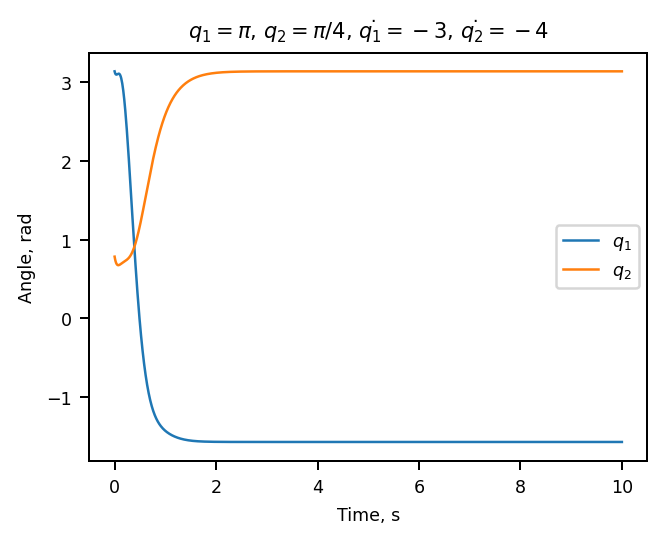

In [53]:
from math import sin
from scipy.integrate import odeint
from scipy.signal import place_poles

def ODE(x0, time, arg):
  x_star = np.array([-np.pi/2, np.pi, 0, 0])
  # linearized dynamics
  x_bar = x0 - x_star
  u = -arg.dot(x_bar)
  # u = np.array([[0]])
  return A.dot(x_bar) + B.dot(u).flatten()

# poles = np.array([-1,-2,-3,-4])
# K = place_poles(A,B, poles).gain_matrix

from scipy.linalg import solve_continuous_are as are

Q = np.array([[100, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])
R = np.array([[1]])
S = are(A, B, Q, R)
K = (B.transpose()).dot(S)
x0 = np.array([np.pi,np.pi/4,-3,-4])
t = np.linspace(0,10,1000)
solution = odeint(ODE, x0, t, (K, ))
plt.plot(t, solution[:, :2])
plt.xlabel('Time, s')
plt.ylabel('Angle, rad')
plt.title("$q_1 = \pi$, $q_2 = \pi/4$, $\dot{q_1} = -3$, $\dot{q_2} = -4$")
plt.legend(['$q_1$', '$q_2$'])
plt.show()